In [16]:
import pandas as pd
import numpy as np
from scipy.linalg import eig

import random
# Read the CSV file
df = pd.read_csv('ContinousDataset2.csv')


print(len(df))

3747


In [17]:
# Filter matches where the host country is not neutral
df = df[df['Venue_Team1'] != 'Neutral']
print(len(df))

2609


In [18]:
# Define the top teams
top_teams = ['Australia', 'India', 'England', 'West Indies', 'South Africa', 'New Zealand', 'Sri Lanka', 'Bangladesh']

# Filter the matches based on top teams
filtered_matches = df[df['Team 1'].isin(top_teams) & df['Team 2'].isin(top_teams)]

print(str(filtered_matches['Match Date']))

0        Jan 5, 1971
1       Aug 24, 1972
2       Aug 26, 1972
3       Aug 28, 1972
5       Jul 18, 1973
            ...     
3736    Oct 18, 2017
3739    Oct 22, 2017
3740    Oct 22, 2017
3742    Oct 25, 2017
3743    Oct 29, 2017
Name: Match Date, Length: 1616, dtype: object


In [19]:
# Calculate the number of times j defeats i for each year
# i = Host vs j =  away => p_host,away = + 1 if away defeats host

# Initialize the year-wise probability matrix
filtered_matches['Years'] = filtered_matches['Match Date'].str[-4:]
prob_matrices = {}
count_matrices = {}

total = 0
total1 = 0
total2 = 0
cumulative_prob_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)
cumulative_count_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)
nested_list = pd.DataFrame(columns=top_teams, index=top_teams)

# Fill the DataFrame with empty lists
for team1 in top_teams:
    for team2 in top_teams:
        nested_list.at[team1, team2] = []

# 2017 is the most recent year.
years = range(2002, 2018)  
start_year = 2017 
end_year = 1995
total_num_years = 20
Z = [[[[] for _ in range(len(top_teams))] for _ in range(len(top_teams))] for _ in range(total_num_years)]

team_to_index = {team: idx for idx, team in enumerate(top_teams)}


# Iterate over the range of years from the most recent year to the desired number of years ago
for num_years in range(1, total_num_years+1):  # From last 1 year to last 15 years
    # Start from the most recent year (2017) and go back 'num_years' years
    year_to_analyze = 2017 - num_years + 1
    print(year_to_analyze)
    matches = filtered_matches[filtered_matches['Years'] == str(year_to_analyze)]
    prob_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)
    count_matrix = pd.DataFrame(0, index=top_teams, columns=top_teams)

    for _, match in matches.iterrows():
        total += 1
        count_matrix.at[str(match['Team 1']), str(match['Team 2'])] += 1
        i = team_to_index.get(str(match['Team 1']))
        j = team_to_index.get(str(match['Team 2']))
        # print(i, str(match['Team 1']), 'vs', j, str(match['Team 2']))
        
        if str(match['Winner']) != str(match['Host_Country']):
            total1 += 1
            prob_matrix.at[str(match['Team 1']), str(match['Team 2'])] += 1
            for year_idx in range(num_years - 1, total_num_years):
                Z[year_idx][i][j].append(True)
        else:
            total2 += 1
            for year_idx in range(num_years - 1, total_num_years):
                Z[year_idx][i][j].append(False)

            
    cumulative_prob_matrix += prob_matrix
    cumulative_count_matrix += count_matrix

    prob_matrices[str(year_to_analyze)] = cumulative_prob_matrix.copy()
    count_matrices[str(year_to_analyze)] = cumulative_count_matrix.copy()
    print(count_matrices[str(year_to_analyze)] )
    
# print(total, total1, total2) # total = total1 + total2
# print(cumulative_prob_matrix)
# print(cumulative_count_matrix)
# print(np.sum(cumulative_prob_matrix, 'all'))

C:\Users\Japneet Singh\AppData\Local\Temp\ipykernel_21176\1448586008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_matches['Years'] = filtered_matches['Match Date'].str[-4:]


2017
              Australia  India  England  West Indies  South Africa  \
Australia             0      0        0            0             0   
India                 5      0        3            0             0   
England               1      0        0            4             3   
West Indies           0      4        3            0             0   
South Africa          0      0        0            0             0   
New Zealand           2      0        0            0             5   
Sri Lanka             0      3        0            0             0   
Bangladesh            0      0        0            0             0   

              New Zealand  Sri Lanka  Bangladesh  
Australia               0          0           0  
India                   3          0           0  
England                 1          0           1  
West Indies             0          0           0  
South Africa            0          5           3  
New Zealand             0          0           0  
Sri Lan

              Australia  India  England  West Indies  South Africa  \
Australia             0     11       16            9            10   
India                16      0       11           12             9   
England              26      8        0            8             8   
West Indies           8     14       11            0             8   
South Africa         13      7        9            5             0   
New Zealand          11      8        4            8            11   
Sri Lanka             8     19        6            4             5   
Bangladesh            3     10        7            9             4   

              New Zealand  Sri Lanka  Bangladesh  
Australia               8         15           0  
India                  12         10           0  
England                10         14           4  
West Indies             5          2           6  
South Africa            7         11           3  
New Zealand             0         11           7  
Sri Lanka   

              Australia  India  England  West Indies  South Africa  \
Australia             0     26       28           17            20   
India                31      0       29           24            18   
England              35     21        0           17            16   
West Indies          21     22       16            0            21   
South Africa         27     15       18           15             0   
New Zealand          27     15       13           18            17   
Sri Lanka            14     34       15            9            13   
Bangladesh            6     19       10           11             9   

              New Zealand  Sri Lanka  Bangladesh  
Australia              20         30           6  
India                  14         19           0  
England                16         23           7  
West Indies            10          8          10  
South Africa           20         22           9  
New Zealand             0         25          10  
Sri Lanka   

In [20]:
print(cumulative_count_matrix.values.sum())
print(total,total1, total2)
print(cumulative_prob_matrix.values.sum())
print(len(top_teams))
print(year_to_analyze)
years_str = [str(year) for year in range(2017, end_year-1, -1)]
print(years_str)
print(len(years_str))
print(Z[0][1])
print(count_matrices[str(2017)])

1053
1053 426 627
426
8
1998
['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995']
23
[[False, False, False, True, False], [], [False, False, True], [], [], [True, False, False], [], []]
              Australia  India  England  West Indies  South Africa  \
Australia             0      0        0            0             0   
India                 5      0        3            0             0   
England               1      0        0            4             3   
West Indies           0      4        3            0             0   
South Africa          0      0        0            0             0   
New Zealand           2      0        0            0             5   
Sri Lanka             0      3        0            0             0   
Bangladesh            0      0        0            0             0   

              New Zealand  Sri Lanka  Bangladesh  


In [21]:
T = np.zeros(len(years)+1)
yy = 0
years_str = [str(year) for year in range(start_year, end_year-1, -1)]
n = len(top_teams)

for year in years_str:
    print(year)
    Xy = prob_matrices[year].values
    Cy = count_matrices[year].values
    Shat = np.where(Cy != 0, Xy / Cy, 0)/len(top_teams)

    for i in range(len(top_teams)):
        Shat[i, i] = 1 - np.sum(Shat[i, :])
    eigenvalues, eigenvectors = np.linalg.eig(Shat.T)
    pihat = eigenvectors[:, np.argmax(eigenvalues)]
    # pihat, D = np.linalg.eig(Shat.values.T)
    pihat = pihat / np.sum(pihat)

    print(pihat)
    print(Xy)
    for i in range(len(top_teams)):
        for j in range(len(top_teams)):
            if Cy[i,j] > 1:
                T[yy] = T[yy] + (pihat[i] + pihat[j])**2*Xy[i,j]*(Xy[i,j] - 1)/(Cy[i,j]*(Cy[i,j]-1)) + pihat[j]**2 - 2*(pihat[i] + pihat[j])*pihat[j]*Xy[i,j]/Cy[i,j]
    yy += 1



print(n*T)

2017
[1. 0. 0. 0. 0. 0. 0. 0.]
[[0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 3 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 3 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
2016
[-1.09505309e-14+0.j -2.44996189e-15+0.j  5.45454545e-01+0.j
  0.00000000e+00+0.j  4.54545455e-01+0.j -2.25547575e-15+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j]
[[0 1 0 0 0 0 0 0]
 [1 0 1 0 0 3 0 0]
 [0 0 0 0 1 0 0 0]
 [3 3 3 0 1 0 0 0]
 [0 0 2 0 0 0 0 0]
 [1 0 0 0 3 0 0 0]
 [3 3 0 0 0 0 0 1]
 [0 0 2 0 0 0 0 0]]
2015
[0.59467144-0.j 0.06794597-0.j 0.07510791-0.j 0.00927267-0.j
 0.13136279-0.j 0.10426219-0.j 0.01263784-0.j 0.00473919-0.j]
[[0 1 0 0 0 0 0 0]
 [1 0 1 0 3 3 0 0]
 [3 0 0 0 1 2 0 0]
 [3 3 3 0 1 0 0 0]
 [0 0 2 1 0 1 0 0]
 [1 0 0 0 3 0 3 0]
 [3 3 0 0 0 0 0 1]
 [0 1 2 0 1 0 0 0]]
2014
[0.31170727-0.j 0.09432765-0.j 0.09963113-0.j 0.04587559-0.j
 0.2918998 -0.j 0.13004963-0.j 0.0223233 -0.j 0.00418562-0.j]
[[0 1 1 0 1 0 0 0]
 [1 0 1 1 3 3 0 0]
 [3 3 0 0 1 2 3 0]
 [3 3 5 0 1 0 0 0]
 [0 0 2 1

C:\Users\Japneet Singh\AppData\Local\Temp\ipykernel_21176\2494248721.py:10: RuntimeWarning: invalid value encountered in divide
  Shat = np.where(Cy != 0, Xy / Cy, 0)/len(top_teams)
C:\Users\Japneet Singh\AppData\Local\Temp\ipykernel_21176\2494248721.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  T[yy] = T[yy] + (pihat[i] + pihat[j])**2*Xy[i,j]*(Xy[i,j] - 1)/(Cy[i,j]*(Cy[i,j]-1)) + pihat[j]**2 - 2*(pihat[i] + pihat[j])*pihat[j]*Xy[i,j]/Cy[i,j]


IndexError: index 17 is out of bounds for axis 0 with size 17

In [28]:
def generate_synthetic_data(n,K):
    alphas = np.random.rand(n)+0.05
    alphas = alphas/np.sum(alphas)
    Pb = np.zeros([n,n])

    for i in range(n):
        for j in range(n):
            Pb[i,j] = alphas[j]/(alphas[i] + alphas[j])
    np.fill_diagonal(Pb, 0)

    syntZ = []

    for i in range(n):
        row_Z = []
        for j in range(n):
            if i!=j and K[i][j]>0:
                samples = np.random.binomial(1, Pb[i][j], K[i][j]).tolist()
                row_Z.append(samples)
            else:
                row_Z.append([])
        syntZ.append(row_Z)
    return syntZ

def compute_test_statistic(pihat,Z,K):
    n = len(pihat)
    T = 0
    for i in range(n):
        for j in range(n):
            pij_hat = pihat[i] + pihat[j]
            if K[i,j] > 1 and i!=j:
                T += ((pij_hat)**2 * (Z[i, j] * (Z[i, j] - 1))) / (K[i,j] * (K[i,j] - 1))  +    pihat[j]**2    -    2 * pihat[j] * pij_hat * (Z[i,j] / K[i,j])

    return T


def construct_Z_empirical_and_Kij(Zlist):
    n = len(Zlist)
    Z_empirical = [[0] * n for _ in range(n)]
    Kij = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i!= j:
                count = sum(Zlist[i][j])
                Z_empirical[i][j] = count
                Kij[i][j] = len(Zlist[i][j])
        Kij[i][i] = 0
    return Z_empirical, Kij



def compute_Tfromlist(Z):
    Zemp , K = construct_Z_empirical_and_Kij(Z)
    n = len(K)
    Zemp = np.array(Zemp)
    K = np.array(K)
    Shat = np.where((K == 0), 0, Zemp / (K * n))
    for i in range(n):
        Shat[i, i] = 1 - np.sum(Shat[i, :])

    pihat = compute_stationary_distribution(Shat)
    T0 = compute_test_statistic(pihat,Zemp,K)
    #     print(pihat)
    return T0

def compute_pifromlist(Z):
    Zemp , K = construct_Z_empirical_and_Kij(Z)
    n = len(K)
    Zemp = np.array(Zemp)
    K = np.array(K)
    Shat = np.where((K == 0), 0, Zemp / (K * n))
    for i in range(n):
        Shat[i, i] = 1 - np.sum(Shat[i, :])

    pihat = compute_stationary_distribution(Shat)
    return pihat


def compute_error(P): # prints ideal error
    n = P.shape[0]
    S = P/n
    for i in range(n):
      S[i,i] = 1 - np.sum(S[i,:])
    pi1 = compute_stationary_distribution(S)
    np.fill_diagonal(P, 0.5)
    Pi = np.diag(pi1)

    error = Pi.dot(P) + P.dot(Pi) - np.ones((n, n)).dot(Pi)

    # Compute the Frobenius norm squared
    result = np.linalg.norm(error, 'fro')**2

    print("ideal error:", result)
    return


# In[7]:


def compute_stationary_distribution(S):
    eigenvalues, eigenvectors = np.linalg.eig(S.T)
    dominant_eigenvalue_index = np.argmax(np.abs(eigenvalues))
    dominant_eigenvalue = eigenvalues[dominant_eigenvalue_index]
    stationary_dist = np.real_if_close(np.abs(eigenvectors[:, dominant_eigenvalue_index]))

    # Normalize the stationary distribution
    stationary_dist /= np.sum(stationary_dist)
    if np.any(stationary_dist == 1):
        stationary_dist = np.zeros_like(stationary_dist)
        print('stationary distribution not unique',stationary_dist )
    return stationary_dist


# In[8]:


def permute_entries(Z, K):
    n = len(Z)
    new_Z = [[[] for _ in range(n)] for _ in range(n)]  # Initialize new_Z as a nested list

    for i in range(n):
        for j in range(n):
            if i != j:
                combined_entries = Z[i][j] + [1 - val for val in Z[j][i]]

                # Shuffle the elements in the combined list
                random.shuffle(combined_entries)

                # Assign the first K[i][j] elements to Z[i][j]
                new_Z[i][j] = combined_entries[:K[i][j]]

                # Assign the remaining elements to Z[j][i]
                new_Z[j][i] = [1 - val for val in combined_entries[K[i][j]:]]

    return new_Z



import copy

def cycle_completion(Zlist):
    n = len(Zlist)
    i = np.random.choice(range(n))
    Zlist2 = copy.deepcopy(Zlist)
    cycle = [i]
    lll = 0
    success =  False
    while lll < 70*n:
        j = np.random.choice(range(n))
        lll += 1
        # print(i,j,Zlist2)
        if j != i and  len(Zlist2[i][j]) > 0:
            entry_num = np.random.choice(range(len(Zlist2[i][j])))
            entry = Zlist2[i][j][entry_num]

            if entry > 0:
                Zlist2[i][j].pop(entry_num)
                Zlist2[j][i].append(entry)
                i = j
                lll = 0
                cycle.append(j)
                if i == cycle[0]:
                    success = True
                    break
    if success == False:
         print('I could not complete the cycle')
            # print(entry,entry[::-1], j,i)
    return Zlist2, success

In [29]:
T0_values = []
T1_values = []
T2_values = []

for num_years in range(2, total_num_years):
    _ , K = construct_Z_empirical_and_Kij(Z[num_years])
    # compute_error(P) # Prints ideal errror (verification)
    T0 = compute_Tfromlist(Z[num_years]) # Compute test statisitic without any reshuffling
    T0_values.append(n*T0)            # print(T0)
    print(2017-num_years, n*T0)
    permuted_T1 = []
    permuted_T2 = []
    
    permZ = copy.deepcopy(Z[num_years])
    for u in range(250):
        syntZ =  generate_synthetic_data(n,K) # Home effect shuffling
        permuted_T1.append( n*compute_Tfromlist(syntZ))
    for u in range(80):
        permZ = permute_entries(permZ,K) # Home effect shuffling
        num_of_cyclic_shuffling = 60
        print(u)
        if u == 0: # Burnout
            num_of_cyclic_shuffling = 40*n                    
        for _ in range(num_of_cyclic_shuffling): # number of cyclic shuffling
            Shuffling_success = False # Shuffling success
            while not Shuffling_success: # sometimes the chain is not irreducible thats why shuffling fails & we restart the cycle 
                dummy, Shuffling_success = cycle_completion(permZ)
#             if Shuffling_success:
            permZ = dummy
        permuted_T2.append(n*compute_Tfromlist(permZ))

    # Calculate the 95% value
    T1_95th = np.percentile(permuted_T1,95)
    T2_95th = np.percentile(permuted_T2,95)
    print('For this year the values are', n*T0, T1_95th,T2_95th) # 
    T1_values.append(T1_95th)
    T2_values.append(T2_95th)

C:\Users\Japneet Singh\AppData\Local\Temp\ipykernel_21176\304479814.py:57: RuntimeWarning: invalid value encountered in divide
  Shat = np.where((K == 0), 0, Zemp / (K * n))


2015 6.465819285250452
stationary distribution not unique [0. 0. 0. 0. 0. 0. 0. 0.]
stationary distribution not unique [0. 0. 0. 0. 0. 0. 0. 0.]
stationary distribution not unique [0. 0. 0. 0. 0. 0. 0. 0.]
stationary distribution not unique [0. 0. 0. 0. 0. 0. 0. 0.]
stationary distribution not unique [0. 0. 0. 0. 0. 0. 0. 0.]
0
1
2
3
4
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
5
6
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could

I could not complete the cycle
I could not complete the cycle
24
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
25
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
26
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle

I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could 

I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could 

I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
60
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I cou

I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could 

I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
For this year the values are 6.465819285250452 0.6960761234155967 1.897178220135718
2014 1.9718833625951298
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not complete the cycle
I could not com

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
For this year the values are 1.578348142815527 0.6245904181835124 0.5351836906937798
2011 1.2918338047492608
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
For this year the values are 1.2918338047492608 0.4220923222598264 0.5040676799301678
2010 1.1457639347699877
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
For this year the values are 1.1457639347699877 0.4344080892357222 0.30010412212954857
2009

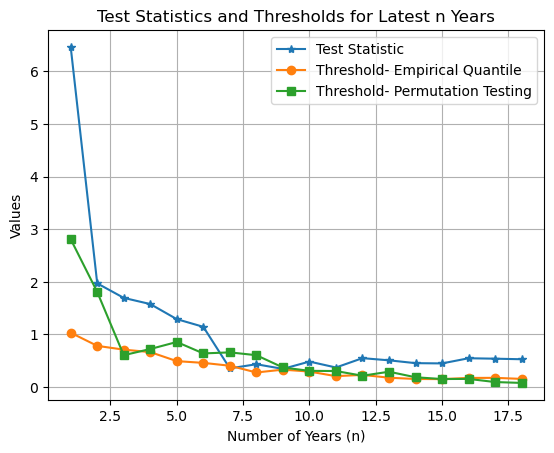

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

# Assuming T0_values, T1_values, and T2_values are numpy arrays or lists containing the respective values

# Define the range of years
years = range(1, len(T0_values) + 1)

# Plot the values
plt.plot(years, T0_values, label='Test Statistic', marker='*')
plt.plot(years, T1_values, label='Threshold- Empirical Quantile', marker='o')
plt.plot(years, T2_values, label='Threshold- Permutation Testing', marker='s')

# Add labels and title
plt.xlabel('Number of Years (n)')
plt.ylabel('Values')
plt.title('Test Statistics and Thresholds for Latest n Years')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
plt.savefig('Cricket.pdf', format='pdf')

# Display the plot
plt.show()

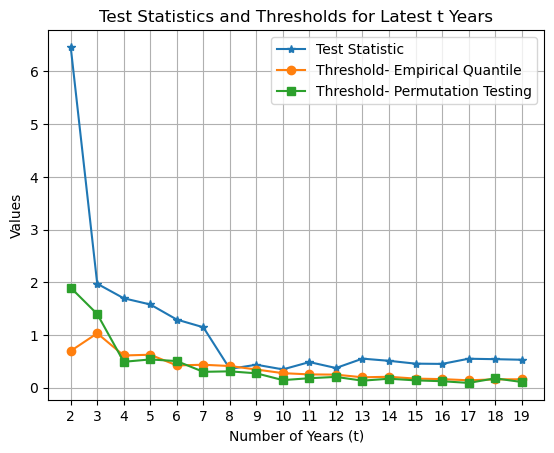

In [30]:
import matplotlib.pyplot as plt

# Assuming T0_values, T1_values, and T2_values are numpy arrays or lists containing the respective values

# Define the range of years
years = range(2,len(T0_values)+2)

# Plot the values
plt.plot(years, T0_values, label='Test Statistic', marker='*')
plt.plot(years, T1_values, label='Threshold- Empirical Quantile', marker='o')
plt.plot(years, T2_values, label='Threshold- Permutation Testing', marker='s')

# Add labels and title
plt.xlabel('Number of Years (t)')
plt.ylabel('Values')
plt.title('Test Statistics and Thresholds for Latest t Years')
plt.legend()

# Set x-ticks to integers starting from 0
plt.xticks(range(2,len(T0_values)+2))

# Show the plot
plt.grid(True)
plt.savefig('Cricket.pdf', format='pdf')
plt.show()